<a href="https://colab.research.google.com/github/KOSETTPAI/Internship/blob/main/NLP_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libararies

In [94]:
!pip install polyglot
!pip install pyicu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.0/260.0 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyicu: filename=PyICU-2.12-cp310-cp310-linux_x86_64.whl size=1754548 sha256=ec3ed97edfea2ff82ca81718880317000eece430095c43546e581e2604bf9427
  Stored in directory: /root/.cache/pip/wheels/74/60/95/66d97ac2fdc8be8e526c4254047405fe77feaf064282d1ad07
Successfully built pyicu


In [96]:
!pip install pycld2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.4/41.4 MB 22.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pycld2: filename=pycld2-0.41-cp310-cp310-linux_x86_64.whl size=9904070 sha256=64c79dd75df1fb14be8a535ea62d31744fda2466bee0801cc583f4ef6a31c970
  Stored in directory: /root/.cache/pip/wheels/be/81/31/240c89c845e008a93d98542325270007de595bfd356eb0b06c
Successfully built pycld2


In [98]:
!pip install Morfessor

In [99]:
import re

from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

from nltk.tokenize import regexp_tokenize
from nltk.tokenize import TweetTokenizer

import requests

import matplotlib.pyplot as plt

from collections import Counter

from nltk.stem import WordNetLemmatizer

from collections import defaultdict
import itertools

from gensim.models import TfidfModel

import spacy

from polyglot.text import Text

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [106]:
!polyglot download embeddings2.fr
!polyglot download ner2.fr

[polyglot_data] Downloading package embeddings2.fr to
[polyglot_data]     /root/polyglot_data...
[polyglot_data] Downloading package ner2.fr to /root/polyglot_data...


In [115]:
!polyglot download embeddings2.es

!polyglot download ner2.es

[polyglot_data] Downloading package embeddings2.es to
[polyglot_data]     /root/polyglot_data...
[polyglot_data]   Package embeddings2.es is already up-to-date!
[polyglot_data] Downloading package ner2.es to /root/polyglot_data...


# **Functions and Some Lists**

In [40]:
def get_text(url):
  response = requests.get(url)
  return response.text

In [41]:
english_stops = get_text("https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/english_stopwords.txt")

## Regular Expression

In [42]:
my_string = "Let's write RegEx!"
re.findall(r"\w+", my_string)

['Let', 's', 'write', 'RegEx']

In [43]:
my_string = "Let's write RegEx!  Won't that be fun?  I sure think so.  Can you find 4 sentences?  Or perhaps, all 19 words?"

sentence_endings = r"[.?!]"
print(re.split(sentence_endings, my_string))

capitalized_words = r"[A-Z]\w+"
print(re.findall(capitalized_words, my_string))

spaces = r"\s+"
print(re.split(spaces, my_string))

digits = r"\d+"
print(re.findall(digits, my_string))

["Let's write RegEx", "  Won't that be fun", '  I sure think so', '  Can you find 4 sentences', '  Or perhaps, all 19 words', '']
['Let', 'RegEx', 'Won', 'Can', 'Or']
["Let's", 'write', 'RegEx!', "Won't", 'that', 'be', 'fun?', 'I', 'sure', 'think', 'so.', 'Can', 'you', 'find', '4', 'sentences?', 'Or', 'perhaps,', 'all', '19', 'words?']
['4', '19']


In [44]:
scene_one = """SCENE 1: [wind] [clop clop clop]
               KING ARTHUR: Whoa there!  [clop clop clop]
               SOLDIER #1: Halt!  Who goes there?
               ARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!
               SOLDIER #1: Pull the other one!
               ARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.
               SOLDIER #1: What?  Ridden on a horse?
               ARTHUR: Yes!
               SOLDIER #1: You're using coconuts!
               ARTHUR: What?
               SOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.
               ARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--
               SOLDIER #1: Where'd you get the coconuts?
               ARTHUR: We found them.
               SOLDIER #1: Found them?  In Mercea?  The coconut's tropical!
               ARTHUR: What do you mean?
               SOLDIER #1: Well, this is a temperate zone.
               ARTHUR: The swallow may fly south with the sun or the house martin or the plover may seek warmer climes in winter, yet these are not strangers to our land?
               SOLDIER #1: Are you suggesting coconuts migrate?
               ARTHUR: Not at all.  They could be carried.
               SOLDIER #1: What?  A swallow carrying a coconut?
               ARTHUR: It could grip it by the husk!
               SOLDIER #1: It's not a question of where he grips it!  It's a simple question of weight ratios!  A five ounce bird could not carry a one pound coconut.
               ARTHUR: Well, it doesn't matter.  Will you go and tell your master that Arthur from the Court of Camelot is here.
               SOLDIER #1: Listen.  In order to maintain air-speed velocity, a swallow needs to beat its wings forty-three times every second, right?
               ARTHUR: Please!
               SOLDIER #1: Am I right?
               ARTHUR: I'm not interested!
               SOLDIER #2: It could be carried by an African swallow!
               SOLDIER #1: Oh, yeah, an African swallow maybe, but not a European swallow.  That's my point.
               SOLDIER #2: Oh, yeah, I agree with that.
               ARTHUR: Will you ask your master if he wants to join my court at Camelot?!
               SOLDIER #1: But then of course a-- African swallows are non-migratory.
               SOLDIER #2: Oh, yeah...
               SOLDIER #1: So they couldn't bring a coconut back anyway...  [clop clop clop]
               SOLDIER #2: Wait a minute!  Supposing two swallows carried it together?
               SOLDIER #1: No, they'd have to have it on a line.
               SOLDIER #2: Well, simple!  They'd just use a strand of creeper!
               SOLDIER #1: What, held under the dorsal guiding feathers?
               SOLDIER #2: Well, why not?"""

In [45]:
sentences = sent_tokenize(scene_one)

tokenized_sent = word_tokenize(sentences[3])

unique_tokens = set(word_tokenize(scene_one))

print(unique_tokens)

{'Pendragon', 'defeator', 'Found', 'In', '1', ']', 'you', 'that', 'zone', 'Saxons', 'back', 'this', 'under', 'length', 'may', 'at', 'England', 'from', 'through', 'with', 'ratios', 'SOLDIER', 'trusty', 'We', 'could', 'horse', 'do', 'warmer', 'not', 'it', 'order', 'That', 'why', '--', 'They', 'SCENE', 'bangin', 'ARTHUR', "'", '#', 'is', 'weight', 'times', 'bird', 'ounce', 'It', "'s", 'tropical', '2', 'be', '[', 'Who', "'ve", 'grips', "'m", 'needs', 'court', 'south', 'who', 'air-speed', 'Supposing', 'minute', 'right', 'strand', 'have', 'your', 'No', "n't", 'house', 'all', 'suggesting', 'second', 'wind', 'use', 'by', 'sovereign', 'speak', 'Will', 'Court', 'but', 'swallow', 'plover', 'strangers', 'maintain', 'Patsy', 'Uther', 'King', 'feathers', 'and', 'A', 'Where', 'carry', 'climes', 'Am', 'knights', 'go', 'guiding', 'them', 'swallows', 'search', 'point', 'does', 'must', 'castle', 'together', 'What', 'just', 'breadth', 'halves', 'five', 'winter', 'pound', '?', 'European', 'goes', "'d", "'e

In [46]:
print(tokenized_sent)

['ARTHUR', ':', 'It', 'is', 'I', ',', 'Arthur', ',', 'son', 'of', 'Uther', 'Pendragon', ',', 'from', 'the', 'castle', 'of', 'Camelot', '.']


In [47]:
match = re.search("coconuts", scene_one)

print(match.start(), match.end())

698 706


In [48]:
pattern2 = r"[\w+]+:"
print(re.match(pattern2, sentences[3]))

<re.Match object; span=(0, 7), match='ARTHUR:'>


In [49]:
tweets = ['This is the best #nlp exercise ive found online! #python',
          '#NLP is super fun! <3 #learning',
          'Thanks @datacamp :) #nlp #python']

In [50]:
pattern1 = r"#\w+"

hashtags = regexp_tokenize(tweets[0], pattern1)
print(hashtags)

['#nlp', '#python']


In [51]:
pattern2 = r"([@#]\w+)"

mentions_hashtags = regexp_tokenize(tweets[-1], pattern2)
print(mentions_hashtags)

['@datacamp', '#nlp', '#python']


In [52]:
tknzr = TweetTokenizer()
all_tokens = [tknzr.tokenize(t) for t in tweets]
print(all_tokens)

[['This', 'is', 'the', 'best', '#nlp', 'exercise', 'ive', 'found', 'online', '!', '#python'], ['#NLP', 'is', 'super', 'fun', '!', '<3', '#learning'], ['Thanks', '@datacamp', ':)', '#nlp', '#python']]


In [53]:
german_text = 'Wann gehen wir Pizza essen? 🍕 Und fährst du mit Über? 🚕'

In [54]:
all_words = word_tokenize(german_text)
print(all_words)

['Wann', 'gehen', 'wir', 'Pizza', 'essen', '?', '🍕', 'Und', 'fährst', 'du', 'mit', 'Über', '?', '🚕']


In [55]:
capital_words = r"[A-ZÜ]\w+"
print(regexp_tokenize(german_text, capital_words))

['Wann', 'Pizza', 'Und', 'Über']


In [56]:
emoji = "['\U0001F300-\U0001F5FF'|'\U0001F600-\U0001F64F'|'\U0001F680-\U0001F6FF'|'\u2600-\u26FF\u2700-\u27BF']"
print(regexp_tokenize(german_text, emoji))

['🍕', '🚕']


In [57]:
holy_grail = get_text("https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/holy_grail.txt")
holy_grail

"SCENE 1: [wind] [clop clop clop] \nKING ARTHUR: Whoa there!  [clop clop clop] \nSOLDIER #1: Halt!  Who goes there?\nARTHUR: It is I, Arthur, son of Uther Pendragon, from the castle of Camelot.  King of the Britons, defeator of the Saxons, sovereign of all England!\nSOLDIER #1: Pull the other one!\nARTHUR: I am, ...  and this is my trusty servant Patsy.  We have ridden the length and breadth of the land in search of knights who will join me in my court at Camelot.  I must speak with your lord and master.\nSOLDIER #1: What?  Ridden on a horse?\nARTHUR: Yes!\nSOLDIER #1: You're using coconuts!\nARTHUR: What?\nSOLDIER #1: You've got two empty halves of coconut and you're bangin' 'em together.\nARTHUR: So?  We have ridden since the snows of winter covered this land, through the kingdom of Mercea, through--\nSOLDIER #1: Where'd you get the coconuts?\nARTHUR: We found them.\nSOLDIER #1: Found them?  In Mercea?  The coconut's tropical!\nARTHUR: What do you mean?\nSOLDIER #1: Well, this is a t

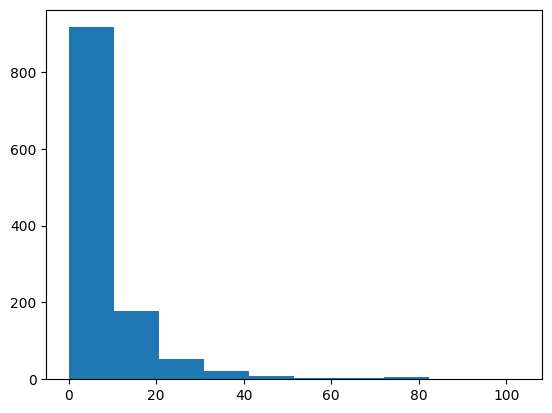

In [58]:
lines = holy_grail.split('\n')

pattern = "[A-Z]{2,}(\s)?(#\d)?([A-Z]{2,})?:"
lines = [re.sub(pattern, '', l) for l in lines]

tokenized_lines = [regexp_tokenize(s, pattern = r"\w+") for s in lines]

line_num_words = [len(t_line) for t_line in tokenized_lines]

plt.hist(line_num_words)

plt.show()

In [59]:
Counter(word_tokenize("The cat is in the box. The cat box."))

Counter({'The': 2, 'cat': 2, 'is': 1, 'in': 1, 'the': 1, 'box': 2, '.': 2})

In [60]:
debugging_article = get_text("https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_debugging.txt")
debugging_article

'\'\'\'Debugging\'\'\' is the process of finding and resolving of defects that prevent correct operation of computer software or a system.  \n\nNumerous books have been written about debugging (see below: #Further reading|Further reading), as it involves numerous aspects, including interactive debugging, control flow, integration testing, Logfile|log files, monitoring (Application monitoring|application, System Monitoring|system), memory dumps, Profiling (computer programming)|profiling, Statistical Process Control, and special design tactics to improve detection while simplifying changes.\n\nOrigin\nA computer log entry from the Mark&nbsp;II, with a moth taped to the page\n\nThe terms "bug" and "debugging" are popularly attributed to Admiral Grace Hopper in the 1940s.[http://foldoc.org/Grace+Hopper Grace Hopper]  from FOLDOC While she was working on a Harvard Mark II|Mark II Computer at Harvard University, her associates discovered a moth stuck in a relay and thereby impeding operatio

In [61]:
tokens = word_tokenize(debugging_article)

lower_tokens = [t.lower() for t in tokens]

bow_simple = Counter(lower_tokens)

print(bow_simple.most_common(10))

[(',', 151), ('the', 150), ('.', 89), ('of', 81), ("''", 69), ('to', 63), ('a', 60), ('``', 47), ('in', 44), ('and', 41)]


In [62]:
alpha_only = [t for t in lower_tokens if t.isalpha()]

no_stops = [t for t in alpha_only if t not in english_stops]

wordnet_lemmatizer = WordNetLemmatizer()

lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

bow = Counter(lemmatized)

print(bow.most_common(10))

[('debugging', 39), ('system', 25), ('bug', 17), ('software', 16), ('problem', 15), ('tool', 15), ('computer', 14), ('process', 13), ('term', 13), ('debugger', 13)]


In [63]:
my_corpus = []

In [64]:
links = ["https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_bug.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_computer.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_debugger.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_debugging.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_exception.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_hopper.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_language.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_malware.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_program.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_reversing.txt",
         "https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/wiki_text_software.txt"]

In [65]:
for link in links:
  article = get_text(link)

  tokens = word_tokenize(article)

  lower_tokens = [t.lower() for t in tokens]

  alpha_only = [t for t in lower_tokens if t.isalpha()]

  no_stops = [t for t in alpha_only if t not in english_stops]

  wordnet_lemmatizer = WordNetLemmatizer()

  lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

  my_corpus.append(lemmatized)

In [66]:
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(my_corpus)

computer_id = dictionary.token2id.get("computer")

print(dictionary.get(computer_id))

corpus = [dictionary.doc2bow(corpus) for corpus in my_corpus]

print(corpus[4][:10])

computer
[(4, 1), (6, 1), (8, 5), (14, 1), (17, 1), (18, 2), (19, 6), (22, 3), (34, 3), (36, 1)]


In [67]:
doc = corpus[4]

bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

for word_id, word_count in bow_doc[:5]:
    print(dictionary.get(word_id), word_count)

# Create the defaultdict: total_word_count
total_word_count = defaultdict(int)
for word_id, word_count in itertools.chain.from_iterable(corpus):
    total_word_count[word_id] += word_count

exception 274
handling 84
language 69
code 66
http 56


In [68]:
tfidf = TfidfModel(corpus)

tfidf_weights = tfidf[doc]

print(tfidf_weights[:5])

sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

for term_id, weight in sorted_tfidf_weights[:5]:
    print(dictionary.get(term_id), weight)

[(4, 0.0005907469493601889), (6, 0.005018544100812155), (8, 0.014890070300692263), (14, 0.0017843805047493204), (17, 0.0017843805047493204)]
exception 0.8159758524779359
handling 0.25015318105163
handler 0.20471315010308994
checked 0.16235870525417476
resumption 0.10588611212228789


In [69]:
uber_article = get_text("https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/uber_apple.txt")

In [78]:
sentences = sent_tokenize(uber_article)

token_sentences = [word_tokenize(sent) for sent in sentences]

pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = True)

for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, "label") and chunk.label() == "NE":
            print(chunk)

(NE Uber/NNP)
(NE Beyond/NN)
(NE Apple/NNP)
(NE Uber/NNP)
(NE Uber/NNP)
(NE Travis/NNP Kalanick/NNP)
(NE Tim/NNP Cook/NNP)
(NE Apple/NNP)
(NE Silicon/NNP Valley/NNP)
(NE CEO/NNP)
(NE Yahoo/NNP)
(NE Marissa/NNP Mayer/NNP)


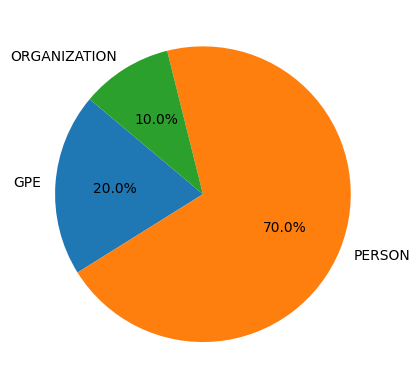

In [82]:
sentences = sent_tokenize(uber_article)

token_sentences = [word_tokenize(sent) for sent in sentences]

pos_sentences = [nltk.pos_tag(sent) for sent in token_sentences]

chunked_sentences = nltk.ne_chunk_sents(pos_sentences, binary = False)

# Create the defaultdict: ner_categories
ner_categories = defaultdict(int)

# Create the nested for loop
for sent in chunked_sentences:
    for chunk in sent:
        if hasattr(chunk, 'label'):
            ner_categories[chunk.label()] += 1

# Create a list from the dictionary keys for the chart labels: labels
labels = list(ner_categories.keys())

# Create a list of the values: values
values = [ner_categories.get(v) for v in labels]

# Create the pie chart
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

# Display the chart
plt.show()

In [85]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser', 'matcher'])

doc = nlp(uber_article)

for ent in doc.ents:
    print(ent.label_, ent.text)

ORG Apple
PERSON Uber
PERSON Travis Kalanick
ORG Uber
PERSON Tim Cook
ORG Apple
CARDINAL Millions
ORG Uber
LOC Silicon Valley’s
NORP democratic
ORG Yahoo
PERSON Marissa Mayer
MONEY 186


In [101]:
french = get_text("https://raw.githubusercontent.com/KOSETTPAI/Internship/main/text%20files/french.txt")

In [107]:
txt = Text(french)

for ent in txt.entities:
    print(ent)

print(type(ent))

['Charles', 'Cuvelliez']
['Charles', 'Cuvelliez']
['Bruxelles']
['l’IA']
['Julien', 'Maldonato']
['Deloitte']
['Ethiquement']
['l’IA']
['.']
<class 'polyglot.text.Chunk'>


In [108]:
entities = [(ent.tag, ' '.join(ent)) for ent in txt.entities]

print(entities)

[('I-PER', 'Charles Cuvelliez'), ('I-PER', 'Charles Cuvelliez'), ('I-ORG', 'Bruxelles'), ('I-PER', 'l’IA'), ('I-PER', 'Julien Maldonato'), ('I-ORG', 'Deloitte'), ('I-PER', 'Ethiquement'), ('I-LOC', 'l’IA'), ('I-PER', '.')]


In [116]:
txt = Text("""Lina del Castillo es profesora en el Instituto de Estudios Latinoamericanos Teresa Lozano Long (LLILAS) y el Departamento de Historia de la Universidad de Texas en Austin.
              Ella será la moderadora del panel “Los Mundos Políticos de Gabriel García Márquez” este viernes, Oct. 30, en el simposio Gabriel García Márquez: Vida y Legado.
              LIna del Castillo Actualmente, sus investigaciones abarcan la intersección de cartografía, disputas a las demandas de tierra y recursos, y la formación del n...el tren de medianoche que lleva a miles y miles de cadáveres uno encima del otro como tantos racimos del banano que acabarán tirados al mar.
              Ningún recuento periodístico podría provocar nuestra imaginación y nuestra memoria como este relato de García Márquez.
              Contenido Relacionado Lea más artículos sobre el archivo de Gabriel García Márquez Reciba mensualmente las últimas noticias e información del Harry Ransom Center con eNews, nuestro correo electrónico mensual.
              ¡Suscríbase hoy!""")

count = 0

for ent in txt.entities:
    if "Márquez" in ent or "Gabo" in ent:
        count += 1

print(count)

percentage = count / len(txt.entities)
print(percentage)

4
0.26666666666666666
